In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers, k_means_pp, ICT_clusters, cfilter, cassign
from External.generation import create_graph, load_image, sample_points_from_image, find_backbone
from External.plotting import plot_points, plot_graph, no_intersections
from External.reweight import reweight_clusters

from copy import deepcopy

# from External.create_k_nearest import patch_together

plt.style.use('animations.mplstyle')

In [5]:
# Hyperparameters
image_name = "image"
ICT_algorithm = "cluster_all"
metric = "euclidean" # metric for clustering

# Cluster rassignment
min_cluster_size = 12
small_behavior = "reassign" #reassign or remove

# image loading
n = number_of_nodes = 1000
Random = False


In [6]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

cluster_centers = centers(position)

In [7]:
mode = "K_Nearest+Density2"

G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()
old_ICT1 = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers, zeros_stay_zeros=True, update_G=1.1)
old_ICT1.indexEdges()

Final k: 11


calculating the densities for the density criterion:   0%|          | 0/1000 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/6370 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/6370 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/6370 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
mode = "K_Nearest+Density2"

G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5, k=200)
G.indexEdges()
old_ICT2 = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers, zeros_stay_zeros=True, update_G=1.1)
old_ICT2.indexEdges()

calculating the densities for the density criterion:   0%|          | 0/1000 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/111998 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/111998 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/111998 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
mode = "K_Nearest+Density2+Recompute"


# Function in generation was modified, such that the used 
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5, k=200)
G.indexEdges()
ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers, zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

calculating the densities for the density criterion:   0%|          | 0/1000 [00:00<?, ?it/s]

updating the distance array:   0%|          | 0/1000 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/110153 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/110153 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

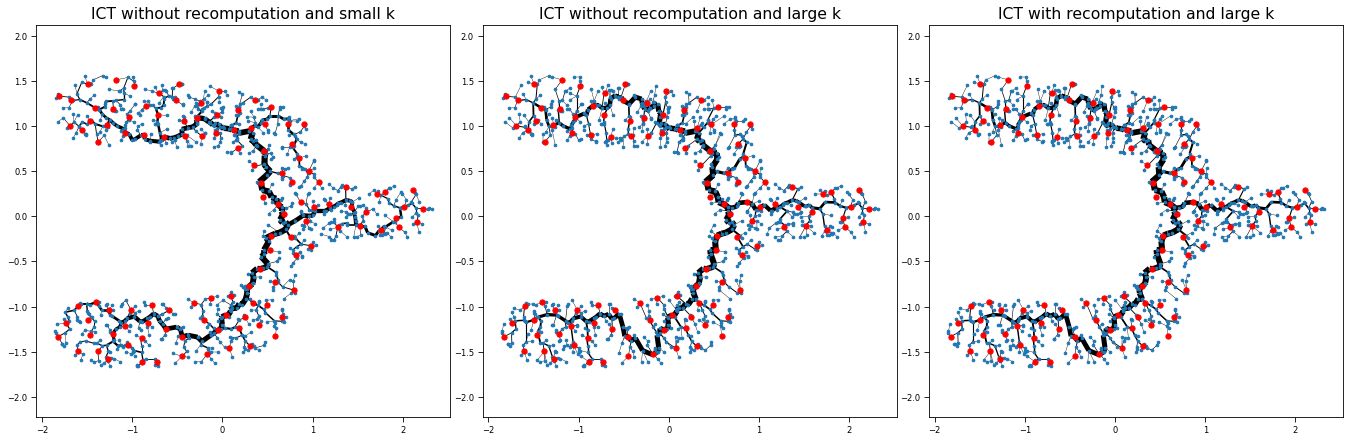

In [11]:
# Plot the ICTs

fig, axs = plt.subplots(1, 3, figsize=(18,6))

plot_points(position, f"", axs[0])
axs[0].get_legend().remove()
plot_graph(old_ICT1, position, f"ICT without recomputation and small k", axs[0], cluster_centers=cluster_centers, node_size=0, edge_scale=0.5)

plot_points(position, f"", axs[1])
axs[1].get_legend().remove()
plot_graph(old_ICT2, position, f"ICT without recomputation and large k", axs[1], cluster_centers=cluster_centers, node_size=0, edge_scale=0.5)

plot_points(position, f"", axs[2])
axs[2].get_legend().remove()
plot_graph(ICT, position, f"ICT with recomputation and large k", axs[2], cluster_centers=cluster_centers, node_size=0, edge_scale=0.5)

plt.tight_layout()
plt.show()